In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pathlib
import tensorflow as tf
import os
import random
import numpy as np

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [3]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

TRAIN_PATH =  '/content/drive/MyDrive/NN/01/stage1_train/'
TEST_PATH = '/content/drive/MyDrive/NN/01/stage1_test'

#TEST_PATH = pathlib.Path('/content/drive/MyDrive/NN/01/stage1_test')

train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)





In [4]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)

    Y_train[n] = mask

Resizing training images and masks


100%|██████████| 670/670 [1:30:05<00:00,  8.07s/it]


Resizing test images


  0%|          | 0/65 [00:00<?, ?it/s]

/content/drive/MyDrive/NN/01/stage1_test/a984e7fb886aa02e29d112766d3ce26a4f78eac540ce7bbdbd42af2761928f6d


  2%|▏         | 1/65 [00:00<00:28,  2.21it/s]

/content/drive/MyDrive/NN/01/stage1_test/191b2b2205f2f5cc9da04702c5d422bc249faf8bca1107af792da63cccfba829


  3%|▎         | 2/65 [00:00<00:25,  2.50it/s]

/content/drive/MyDrive/NN/01/stage1_test/4f949bd8d914bbfa06f40d6a0e2b5b75c38bf53dbcbafc48c97f105bee4f8fac


  5%|▍         | 3/65 [00:01<00:23,  2.63it/s]

/content/drive/MyDrive/NN/01/stage1_test/a4816cc1fb76cb3c5e481186833fc0ae9cf426a1406a2607e974e65e9cddba4f


  6%|▌         | 4/65 [00:01<00:22,  2.75it/s]

/content/drive/MyDrive/NN/01/stage1_test/d616d323a9eeb9da1b66f8d5df671d63c092c9919cb2c0b223e29c63257c944d


  8%|▊         | 5/65 [00:01<00:22,  2.66it/s]

/content/drive/MyDrive/NN/01/stage1_test/1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c


  9%|▉         | 6/65 [00:02<00:26,  2.21it/s]

/content/drive/MyDrive/NN/01/stage1_test/4727d94c6a57ed484270fdd8bbc6e3d5f2f15d5476794a4e37a40f2309a091e2


 11%|█         | 7/65 [00:02<00:25,  2.28it/s]

/content/drive/MyDrive/NN/01/stage1_test/3c4c675825f7509877bc10497f498c9a2e3433bf922bd870914a2eb21a54fd26


 12%|█▏        | 8/65 [00:03<00:25,  2.24it/s]

/content/drive/MyDrive/NN/01/stage1_test/1962d0c5faf3e85cda80e0578e0cb7aca50826d781620e5c1c4cc586bc69f81a


 14%|█▍        | 9/65 [00:03<00:23,  2.39it/s]

/content/drive/MyDrive/NN/01/stage1_test/336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523


 15%|█▌        | 10/65 [00:04<00:23,  2.38it/s]

/content/drive/MyDrive/NN/01/stage1_test/43a71aeb641faa18742cb826772a8566c6c947d7050f9ab15459de6cc2b3b6af


 17%|█▋        | 11/65 [00:04<00:25,  2.14it/s]

/content/drive/MyDrive/NN/01/stage1_test/8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab


 18%|█▊        | 12/65 [00:05<00:25,  2.10it/s]

/content/drive/MyDrive/NN/01/stage1_test/b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3


 20%|██        | 13/65 [00:05<00:23,  2.24it/s]

/content/drive/MyDrive/NN/01/stage1_test/38f5cfb55fc8b048e82a5c895b25fefae7a70c71ab9990c535d1030637bf6a1f


 22%|██▏       | 14/65 [00:05<00:21,  2.37it/s]

/content/drive/MyDrive/NN/01/stage1_test/7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04


 23%|██▎       | 15/65 [00:06<00:20,  2.45it/s]

/content/drive/MyDrive/NN/01/stage1_test/f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4


 25%|██▍       | 16/65 [00:06<00:22,  2.20it/s]

/content/drive/MyDrive/NN/01/stage1_test/dab46d798d29aff2e99c23f47ed3064f5cafb1644629b015c95a2dd2ee593bb4


 26%|██▌       | 17/65 [00:07<00:22,  2.16it/s]

/content/drive/MyDrive/NN/01/stage1_test/697a05c6fe4a07c601d46da80885645ad574ea19b47ee795ccff216c9f1f1808


 28%|██▊       | 18/65 [00:07<00:20,  2.27it/s]

/content/drive/MyDrive/NN/01/stage1_test/9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab


 29%|██▉       | 19/65 [00:08<00:23,  1.99it/s]

/content/drive/MyDrive/NN/01/stage1_test/e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d86028dc1222192a9258


 31%|███       | 20/65 [00:08<00:21,  2.14it/s]

/content/drive/MyDrive/NN/01/stage1_test/550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18


 32%|███▏      | 21/65 [00:09<00:18,  2.32it/s]

/content/drive/MyDrive/NN/01/stage1_test/5cee644e5ffbef1ba021c7f389b33bafd3b1841f04d3edd7922d5084c2c4e0c7


 34%|███▍      | 22/65 [00:09<00:18,  2.34it/s]

/content/drive/MyDrive/NN/01/stage1_test/51c70bb8a299943b27f8b354571272692d8f2705036a1a9562156c76da5f025b


 35%|███▌      | 23/65 [00:10<00:18,  2.25it/s]

/content/drive/MyDrive/NN/01/stage1_test/17b9bf4356db24967c4677b8376ac38f826de73a88b93a8d73a8b452e399cdff


 37%|███▋      | 24/65 [00:10<00:17,  2.29it/s]

/content/drive/MyDrive/NN/01/stage1_test/31f1fbe85b8899258ea5bcf5f93f7ac8238660c386aeab40649c715bd2e38a0a


 38%|███▊      | 25/65 [00:11<00:18,  2.13it/s]

/content/drive/MyDrive/NN/01/stage1_test/fe9adb627a6f45747c5a8223b671774791ededf9364f6544be487c540107fa4f


 40%|████      | 26/65 [00:11<00:16,  2.38it/s]

/content/drive/MyDrive/NN/01/stage1_test/ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8


 42%|████▏     | 27/65 [00:11<00:15,  2.46it/s]

/content/drive/MyDrive/NN/01/stage1_test/699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68


 43%|████▎     | 28/65 [00:12<00:14,  2.51it/s]

/content/drive/MyDrive/NN/01/stage1_test/0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac


 45%|████▍     | 29/65 [00:12<00:14,  2.55it/s]

/content/drive/MyDrive/NN/01/stage1_test/432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580


 46%|████▌     | 30/65 [00:12<00:14,  2.47it/s]

/content/drive/MyDrive/NN/01/stage1_test/eea70a7948d25a9a791dbcb39228af4ea4049fe5ebdee9c04884be8cca3da835


 48%|████▊     | 31/65 [00:13<00:14,  2.41it/s]

/content/drive/MyDrive/NN/01/stage1_test/0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732


 49%|████▉     | 32/65 [00:13<00:13,  2.46it/s]

/content/drive/MyDrive/NN/01/stage1_test/44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078


 51%|█████     | 33/65 [00:14<00:12,  2.54it/s]

/content/drive/MyDrive/NN/01/stage1_test/1ef68e93964c2d9230100c1347c328f6385a7bc027879dc3d4c055e6fe80cb3c


 52%|█████▏    | 34/65 [00:14<00:11,  2.68it/s]

/content/drive/MyDrive/NN/01/stage1_test/1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e


 54%|█████▍    | 35/65 [00:15<00:15,  1.99it/s]

/content/drive/MyDrive/NN/01/stage1_test/d6eb7ce7723e2f6dc13b90b41a29ded27dbd815bad633fdf582447c686018896


 55%|█████▌    | 36/65 [00:15<00:13,  2.19it/s]

/content/drive/MyDrive/NN/01/stage1_test/ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef


 57%|█████▋    | 37/65 [00:15<00:12,  2.33it/s]

/content/drive/MyDrive/NN/01/stage1_test/472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71


 58%|█████▊    | 38/65 [00:16<00:13,  1.97it/s]

/content/drive/MyDrive/NN/01/stage1_test/295682d9eb5acb5c1976a460c085734bfaf38482b0a3f02591c2bfdcd4128549


 60%|██████    | 39/65 [00:17<00:12,  2.10it/s]

/content/drive/MyDrive/NN/01/stage1_test/505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81


 62%|██████▏   | 40/65 [00:17<00:11,  2.16it/s]

/content/drive/MyDrive/NN/01/stage1_test/0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5


 63%|██████▎   | 41/65 [00:17<00:10,  2.25it/s]

/content/drive/MyDrive/NN/01/stage1_test/d8d4bf68a76e4e4c5f21de7ac613451f7115a04db686151e78b8ec0b6a22022b


 65%|██████▍   | 42/65 [00:18<00:09,  2.35it/s]

/content/drive/MyDrive/NN/01/stage1_test/78a981bd27ba0c65a9169548665a17bda9f49050d0d3893a6567d1eb92cd003d


 66%|██████▌   | 43/65 [00:18<00:08,  2.47it/s]

/content/drive/MyDrive/NN/01/stage1_test/259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4


 68%|██████▊   | 44/65 [00:18<00:08,  2.53it/s]

/content/drive/MyDrive/NN/01/stage1_test/fac507fa4d1649e8b24c195d990f1fc3ca3633d917839e1751a9d412a14ab5e3


 69%|██████▉   | 45/65 [00:19<00:08,  2.30it/s]

/content/drive/MyDrive/NN/01/stage1_test/1d9eacb3161f1e2b45550389ecf7c535c7199c6b44b1c6a46303f7b965e508f1


 71%|███████   | 46/65 [00:19<00:07,  2.42it/s]

/content/drive/MyDrive/NN/01/stage1_test/7f4cbe0b36b5d09466476a7d4e01f4f976c67872d549f4ff47b3e1e3a2b403af


 72%|███████▏  | 47/65 [00:20<00:07,  2.56it/s]

/content/drive/MyDrive/NN/01/stage1_test/519dc0d672d1c295fc69b629af8721ccb1a1f136d1976685a68487e62547ffe0


 74%|███████▍  | 48/65 [00:20<00:06,  2.58it/s]

/content/drive/MyDrive/NN/01/stage1_test/df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8


 75%|███████▌  | 49/65 [00:20<00:06,  2.65it/s]

/content/drive/MyDrive/NN/01/stage1_test/53df5150ee56253fe5bc91a9230d377bb21f1300f443ba45a758bcb01a15c0e4


 77%|███████▋  | 50/65 [00:21<00:05,  2.72it/s]

/content/drive/MyDrive/NN/01/stage1_test/0f1f896d9ae5a04752d3239c690402c022db4d72c0d2c087d73380896f72c466


 78%|███████▊  | 51/65 [00:21<00:05,  2.77it/s]

/content/drive/MyDrive/NN/01/stage1_test/648c8ffa496e1716017906d0bf135debfc93386ae86aa3d4adbda9a505985fd9


 80%|████████  | 52/65 [00:22<00:04,  2.69it/s]

/content/drive/MyDrive/NN/01/stage1_test/912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406


 82%|████████▏ | 53/65 [00:22<00:04,  2.77it/s]

/content/drive/MyDrive/NN/01/stage1_test/1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b


 83%|████████▎ | 54/65 [00:22<00:04,  2.58it/s]

/content/drive/MyDrive/NN/01/stage1_test/c8e79ff4ac55f4b772057de28e539727b7f4f2a3de73bf7a082a0ace86d609eb


 85%|████████▍ | 55/65 [00:23<00:04,  2.45it/s]

/content/drive/MyDrive/NN/01/stage1_test/9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2


 86%|████████▌ | 56/65 [00:23<00:03,  2.53it/s]

/content/drive/MyDrive/NN/01/stage1_test/ade080c6618cbbb0a25680cf847f312b5e19b22bfe1cafec0436987ebe5b1e7e


 88%|████████▊ | 57/65 [00:24<00:03,  2.56it/s]

/content/drive/MyDrive/NN/01/stage1_test/52b267e20519174e3ce1e1994b5d677804b16bc670aa5f6ffb6344a0fdf63fde


 89%|████████▉ | 58/65 [00:24<00:02,  2.46it/s]

/content/drive/MyDrive/NN/01/stage1_test/da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab


 91%|█████████ | 59/65 [00:25<00:02,  2.10it/s]

/content/drive/MyDrive/NN/01/stage1_test/f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb


 92%|█████████▏| 60/65 [00:25<00:02,  2.15it/s]

/content/drive/MyDrive/NN/01/stage1_test/0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd47cf7b0e8b7d63f0925


 94%|█████████▍| 61/65 [00:25<00:01,  2.19it/s]

/content/drive/MyDrive/NN/01/stage1_test/0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6


 95%|█████████▌| 62/65 [00:26<00:01,  2.13it/s]

/content/drive/MyDrive/NN/01/stage1_test/8922a6ac8fd0258ec27738ca101867169b20d90a60fc84f93df77acd5bf7c80b


 97%|█████████▋| 63/65 [00:26<00:00,  2.20it/s]

/content/drive/MyDrive/NN/01/stage1_test/bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d


 98%|█████████▊| 64/65 [00:27<00:00,  2.27it/s]

/content/drive/MyDrive/NN/01/stage1_test/4be73d68f433869188fe5e7f09c7f681ed51003da6aa5d19ce368726d8e271ee


100%|██████████| 65/65 [00:27<00:00,  2.33it/s]


Done!


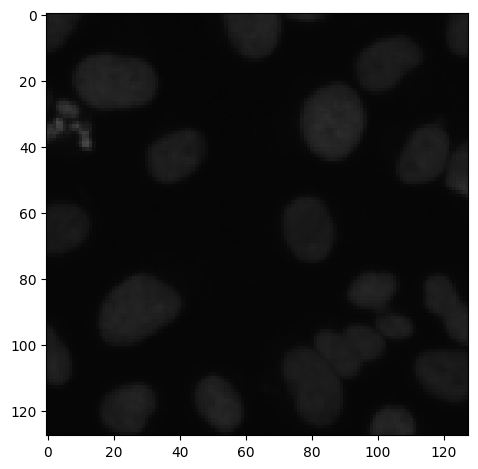

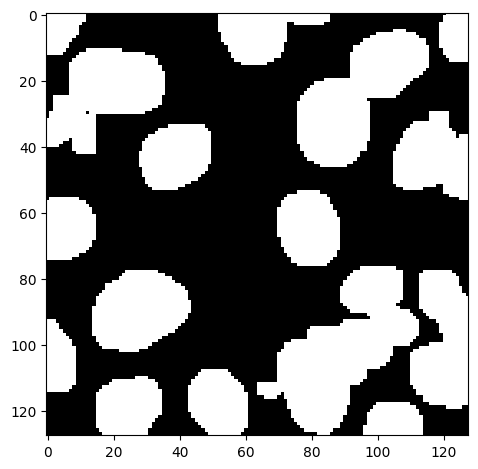

In [12]:
# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images')
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + "/" +id_
    print(path)
    img = imread(path + "/images/" + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                              

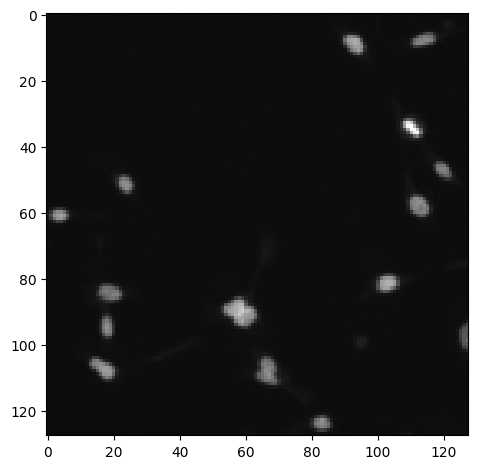

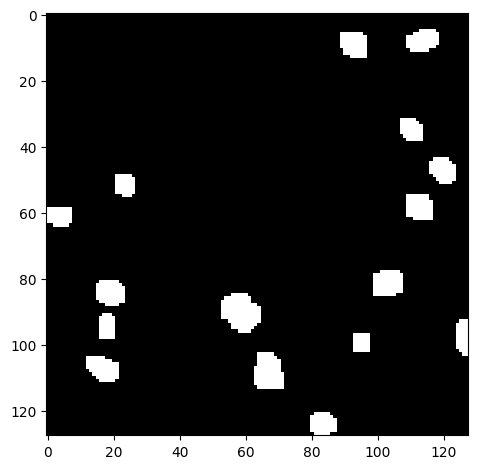

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


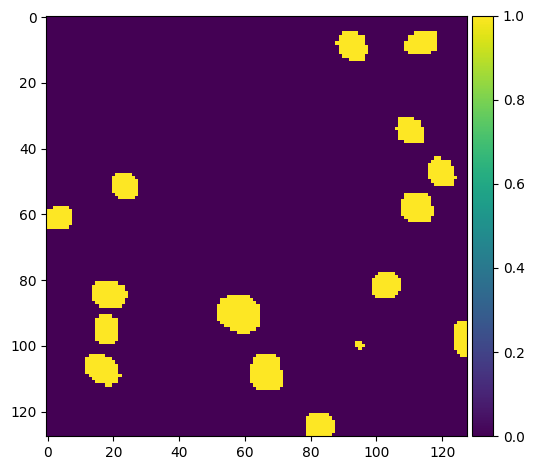

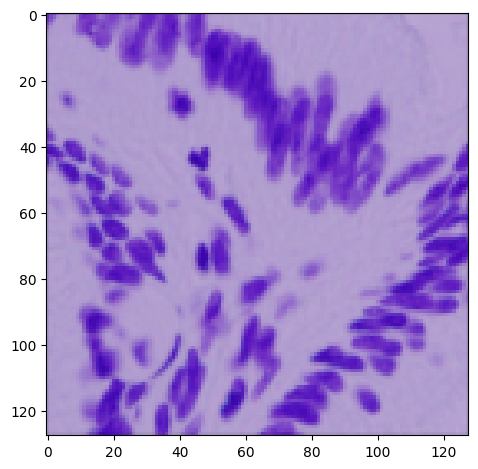

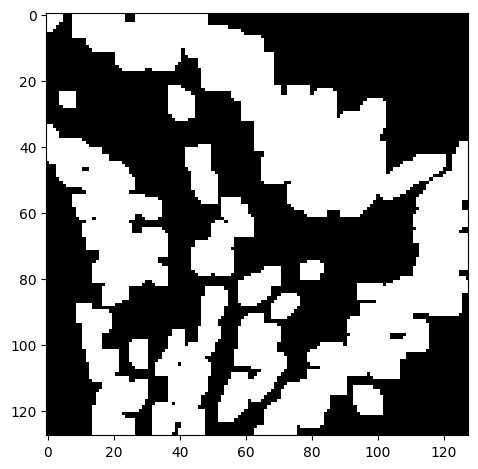

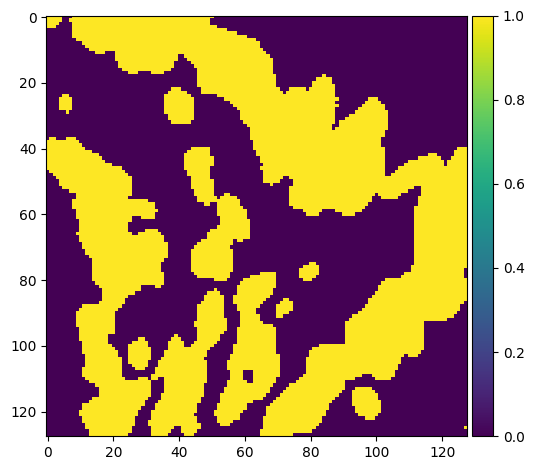

In [13]:


#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

################################
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

####################################

idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()